sentiment analysis in python using two different techniques:

VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach
Roberta Pretrained Model from 🤗
Huggingface Pipeline

# **Read in Data and NLTK**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [2]:
# Read in data
df = pd.read_csv('flipkart_data.csv')


In [3]:
df.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


In [4]:
df.shape

(9976, 2)

In [5]:
df=df.head(1000)

# EDA

In [6]:
# Remove duplicates
df.drop_duplicates(inplace=True)

/tmp/ipython-input-6-3634608106.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [7]:
# Create a sentiment column based on rating
df['sentiment'] = df['rating'].apply(lambda x: 1 if x >= 4 else 0)

# Encode sentiment labels (this step is now redundant as we created the column directly)
# df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Display the first few rows with the new sentiment column
display(df.head())

/tmp/ipython-input-7-2599807506.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['rating'].apply(lambda x: 1 if x >= 4 else 0)


,review,rating,sentiment
0,It was nice produt. I like it's design a lot. ...,5,1
1,awesome sound....very pretty to see this nd th...,5,1
2,awesome sound quality. pros 7-8 hrs of battery...,4,1
3,I think it is such a good product not only as ...,5,1
4,awesome bass sound quality very good bettary l...,5,1


In [8]:
df.shape

(1000, 3)

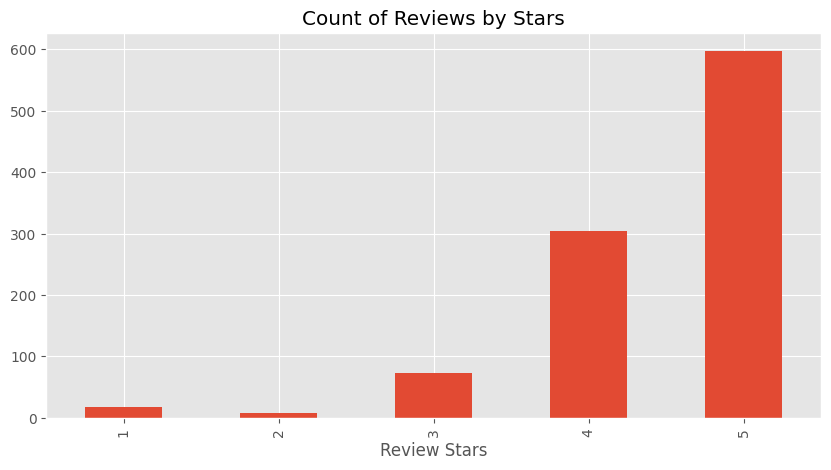

In [9]:
ax = df['rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [10]:
df['review'][50]

'This product is very good.1. The super extra bass is working properly.2.battery backup is best normally 8-9 hours.3. charging time is correct as description as product details.4.in the box a audio plug, charger cable,warranty card, user manual,etc.5.With high definition balanced sound.6. Next & previous function not working in laptop but it works in mobile.READ MORE'

In [11]:
import re
import string

In [12]:
# Clean the review text
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    return text.strip()

In [13]:
# Apply cleaning
df['review'] = df['review'].apply(clean_text)

In [14]:
df['review']

,review
0,it was nice produt. i like it's design a lot. ...
1,awesome sound....very pretty to see this nd th...
2,awesome sound quality. pros - hrs of battery l...
3,i think it is such a good product not only as ...
4,awesome bass sound quality very good bettary l...
...,...
995,i'm very thankful for this product because fol...
996,packaging was good. as usual ontime delivery b...
997,pros :- superb bass clear and soothing sound o...
998,nice sound great quality bass also great. priz...


# Basic NLTK

In [15]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [16]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [17]:
nltk.download('maxent_ne_chunker_tab')

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!


True

In [18]:
example = df['review'][50]
print(example)

this product is very good.. the super extra bass is working properly..battery backup is best normally - hours.. charging time is correct as description as product details..in the box a audio plug, charger cable,warranty card, user manual,etc..with high definition balanced sound.. next & previous function not working in laptop but it works in mobile.read more


In [19]:
tokens = nltk.word_tokenize(example)
tokens[:20]

['this',
 'product',
 'is',
 'very',
 'good',
 '..',
 'the',
 'super',
 'extra',
 'bass',
 'is',
 'working',
 'properly',
 '..',
 'battery',
 'backup',
 'is',
 'best',
 'normally',
 '-']

In [20]:
tagged = nltk.pos_tag(tokens)
tagged[:20]

[('this', 'DT'),
 ('product', 'NN'),
 ('is', 'VBZ'),
 ('very', 'RB'),
 ('good', 'JJ'),
 ('..', 'VB'),
 ('the', 'DT'),
 ('super', 'NN'),
 ('extra', 'JJ'),
 ('bass', 'NN'),
 ('is', 'VBZ'),
 ('working', 'VBG'),
 ('properly', 'RB'),
 ('..', 'JJ'),
 ('battery', 'NN'),
 ('backup', 'NN'),
 ('is', 'VBZ'),
 ('best', 'RBS'),
 ('normally', 'RB'),
 ('-', ':')]

In [21]:
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [22]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  this/DT
  product/NN
  is/VBZ
  very/RB
  good/JJ
  ../VB
  the/DT
  super/NN
  extra/JJ
  bass/NN
  is/VBZ
  working/VBG
  properly/RB
  ../JJ
  battery/NN
  backup/NN
  is/VBZ
  best/RBS
  normally/RB
  -/:
  hours/NNS
  ../IN
  charging/VBG
  time/NN
  is/VBZ
  correct/JJ
  as/RB
  description/NN
  as/IN
  product/NN
  details/NNS
  ../VBP
  in/IN
  the/DT
  box/NN
  a/DT
  audio/JJ
  plug/NN
  ,/,
  charger/NN
  cable/NN
  ,/,
  warranty/NN
  card/NN
  ,/,
  user/JJ
  manual/NN
  ,/,
  etc/FW
  ../FW
  with/IN
  high/JJ
  definition/NN
  balanced/VBD
  sound/JJ
  ../NNP
  next/JJ
  &/CC
  previous/JJ
  function/NN
  not/RB
  working/VBG
  in/IN
  laptop/JJ
  but/CC
  it/PRP
  works/VBZ
  in/IN
  mobile.read/NN
  more/RBR)


# **VADER Seniment Scoring**

I will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.

This uses a "bag of words" approach:
Stop words are removed
each word is scored and combined to a total score.

In [23]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [24]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [25]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [26]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [27]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.906, 'pos': 0.094, 'compound': 0.6348}

# Run the polarity score on the entire dataset

In [45]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['review']
    res[i] = sia.polarity_scores(text)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [46]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
# Include the 'sentiment' and 'rating' columns from df during the merge
vaders = vaders.merge(df[['sentiment', 'rating']], left_on='Id', right_index=True)

In [47]:
# sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,sentiment,rating
0,0,0.0,0.613,0.387,0.8020,1,5
1,1,0.0,0.517,0.483,0.9501,1,5
2,2,0.0,0.819,0.181,0.9310,1,4
3,3,0.0,0.672,0.328,0.9851,1,5
4,4,0.0,0.595,0.405,0.9053,1,5


In [48]:
df.head()

,review,rating,sentiment
0,it was nice produt. i like it's design a lot. ...,5,1
1,awesome sound....very pretty to see this nd th...,5,1
2,awesome sound quality. pros - hrs of battery l...,4,1
3,i think it is such a good product not only as ...,5,1
4,awesome bass sound quality very good bettary l...,5,1


In [49]:
# Showing target variable counts
print(df['sentiment'].value_counts())

sentiment
1    901
0     99
Name: count, dtype: int64


# Plot VADER results

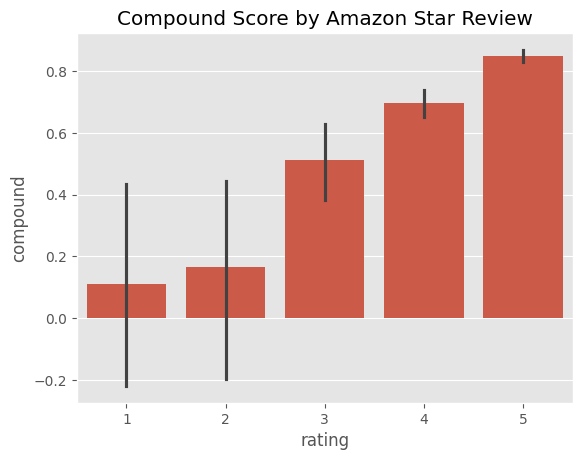

In [50]:
ax = sns.barplot(data=vaders, x='rating', y='compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

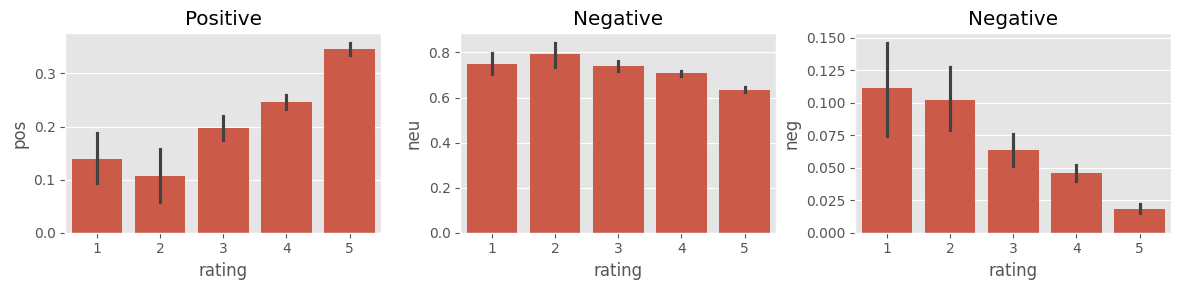

In [57]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Negative')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

Interpretation:

VADER Sentiment Scores Are Valid.

The sentiment scores align well with star ratings, validating the sentiment model.

# Roberta Pretrained Model

---> Use a model trained of a large corpus of data.

---> Transformer model accounts for the words but also the context related to other words.

In [59]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [61]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [62]:
# VADER results on example
print(example)
sia.polarity_scores(example)

this product is very good.. the super extra bass is working properly..battery backup is best normally - hours.. charging time is correct as description as product details..in the box a audio plug, charger cable,warranty card, user manual,etc..with high definition balanced sound.. next & previous function not working in laptop but it works in mobile.read more


{'neg': 0.0, 'neu': 0.906, 'pos': 0.094, 'compound': 0.6348}

In [63]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': np.float32(0.0049521397), 'roberta_neu': np.float32(0.029323312), 'roberta_pos': np.float32(0.9657246)}


In [64]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [67]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['review']
        # Removed the line accessing 'Id' as it's not in the DataFrame
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[i] = both # Use the index 'i' as the key
    except RuntimeError:
        print(f'Broke for row index {i}') # Print row index instead of 'id'

  0%|          | 0/1000 [00:00<?, ?it/s]

In [69]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left', left_on='Id', right_index=True)

# Compare Scores between models

In [70]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'review', 'rating',
       'sentiment'],
      dtype='object')

# **Combine and compare**

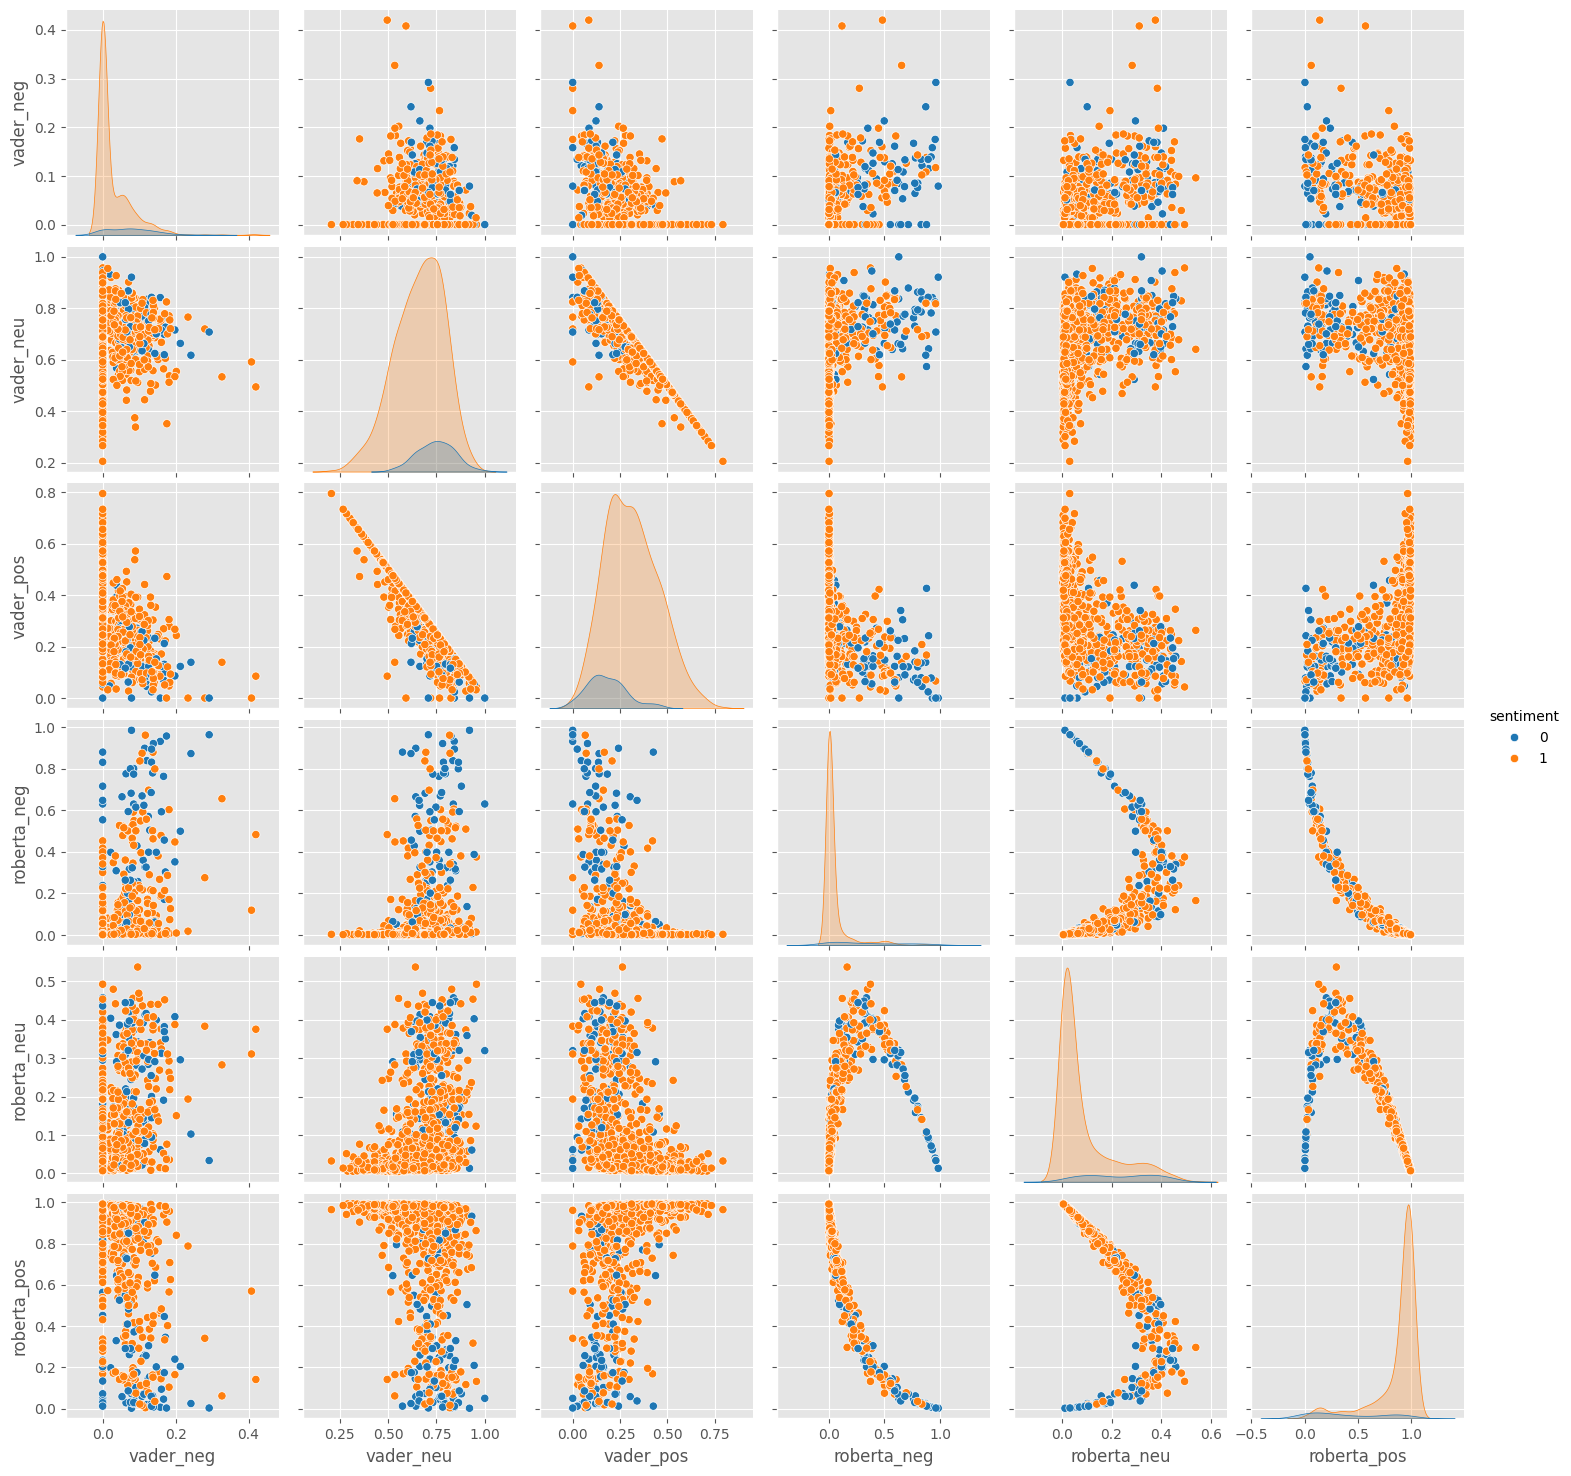

In [72]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='sentiment',
            palette='tab10')
plt.show()

# Review Examples:

In [74]:
results_df.query('sentiment == 1') \
    .sort_values('roberta_pos', ascending=False)['review'].values[0]

'awesome product.... iam enjoying my free time with this... the design so good and sounds amazing..... 😄read more'

In [79]:
results_df.query('sentiment == 1') \
    .sort_values('vader_pos', ascending=False)['review'].values[0]

'awesome bass , awesome clear sound, awesome backup, awesome design, awesome prouctread more'

In [81]:
results_df.query('rating == 5') \
    .sort_values('roberta_neg', ascending=False)['review'].values[0]

'best sound quality , perfect bass , but build quality is not so good , and aux cable defected, and led light not so good ...read more'

In [82]:
results_df.query('rating == 5') \
    .sort_values('vader_neg', ascending=False)['review'].values[0]

'nice but not good pubg good battery life sound is good but not bassread more'

# **The Transformers Pipeline**

In [83]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0


In [86]:
sent_pipeline('I do love sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9997547268867493}]

In [87]:
sent_pipeline('Make sure to like and subscribe!')

[{'label': 'POSITIVE', 'score': 0.9991742968559265}]

In [88]:
sent_pipeline('booo')

[{'label': 'NEGATIVE', 'score': 0.9936267137527466}]

In [92]:
sent_pipeline("i don't like this")

[{'label': 'NEGATIVE', 'score': 0.9914432168006897}]

In [94]:
sent_pipeline('lol!what it is?')

[{'label': 'NEGATIVE', 'score': 0.9285917282104492}]

In [95]:
sent_pipeline('Good quality product. But the side fixable rings are not fitted properly and the black rubber frame should have been more thicker and sturdy.')

[{'label': 'NEGATIVE', 'score': 0.9982640147209167}]